# Exercise Week 4
- Dave Schurtenberger
- Luca Kyburz
- Pascal Gansner
- Sofia Horlacher

In [1]:
from utils import plot_arma_process
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np


## 1. Simulate and analyze AR, MA, ARMA, ARIMA, SARIMA models
  - Generate time series data then compute ACF and PACF.
  - Determine model orders.
  - Compare empiric ACF and PACF with theoretical counterpart.
  - Estimate the model parameters from the generated data.

### 1.1 Autoregressive Model

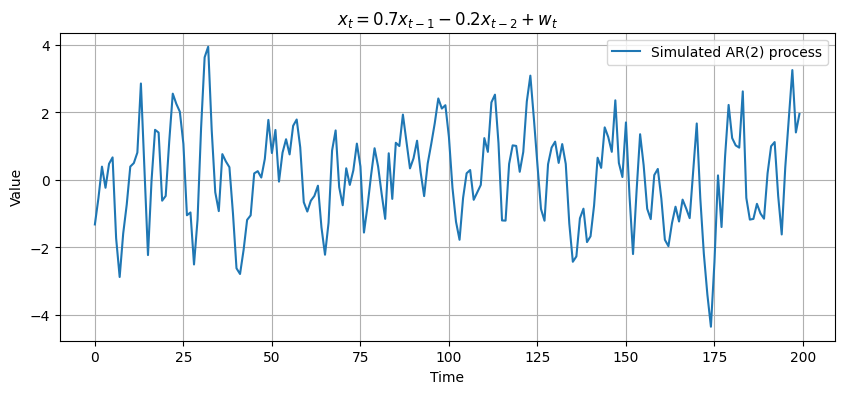

In [2]:
# AR(2) process coefficients
ar = np.array([1, -0.7, 0.2])
ma = np.array([1])

# Create ARMA process
arma_process = ArmaProcess(ar, ma)

# Generate sample
x = arma_process.generate_sample(nsample=200)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, label='Simulated AR(2) process')
plt.title(r'$x_t = 0.7x_{t-1} - 0.2x_{t-2} + w_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


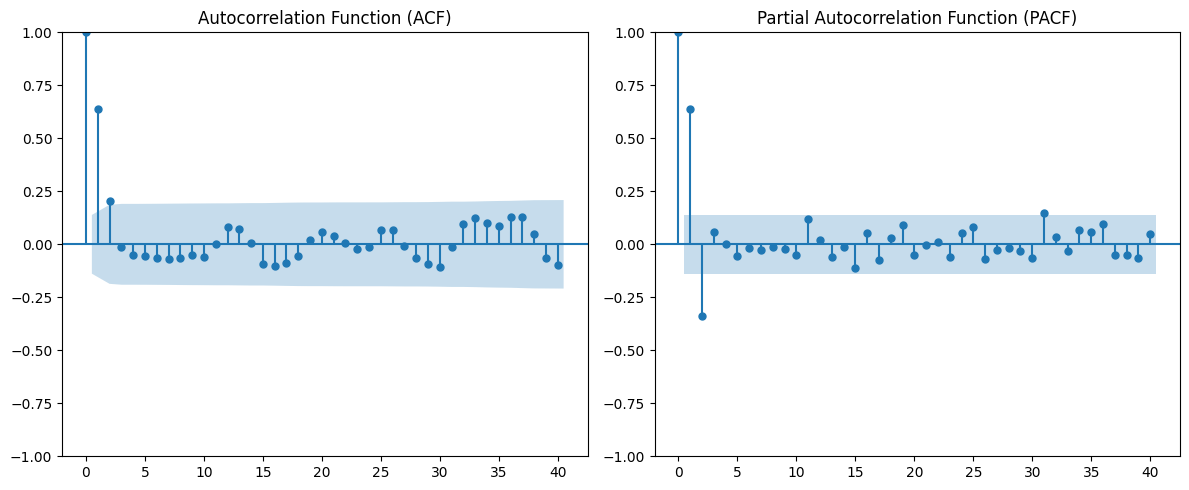

In [3]:
def plot_acf_and_pacf(x, lags=40):
    """Plot ACF and PACF of the time series x."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot ACF
    plot_acf(x, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Plot PACF
    plot_pacf(x, lags=lags, ax=ax[1], method='ywm')
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

plot_acf_and_pacf(x)

### 1.2 Moving Average

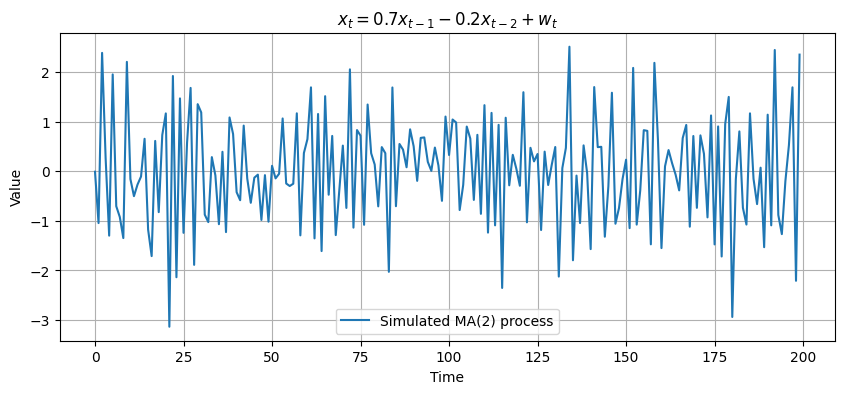

In [4]:
# AR(2) process coefficients
ar = np.array([1])
ma = np.array([1, -0.7, 0.2])

# Create ARMA process
arma_process = ArmaProcess(ar, ma)

# Generate sample
x = arma_process.generate_sample(nsample=200)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, label='Simulated MA(2) process')
plt.title(r'$x_t = 0.7x_{t-1} - 0.2x_{t-2} + w_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


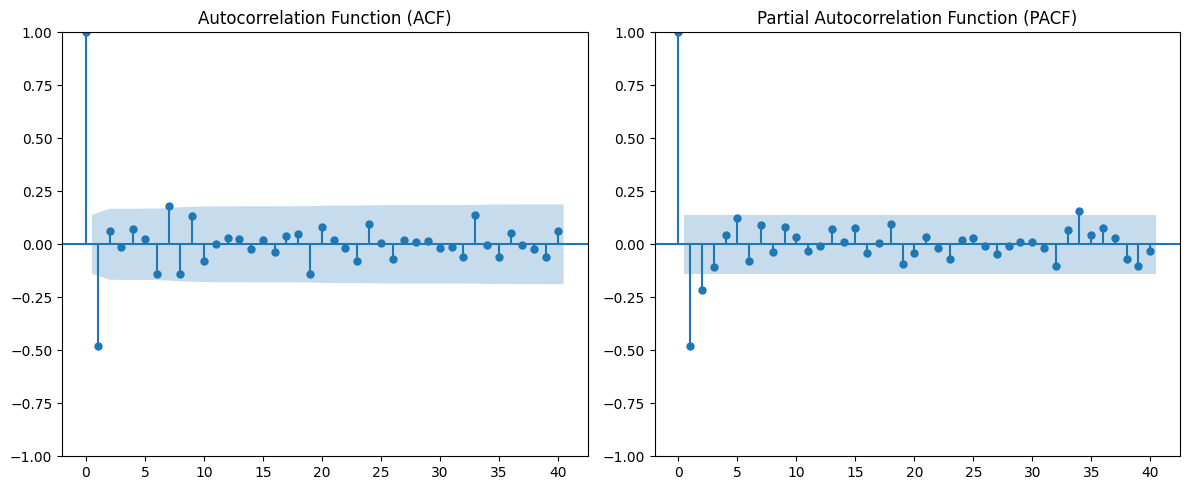

In [5]:
plot_acf_and_pacf(x)

### 1.3 Autoregressive Moving Avverage

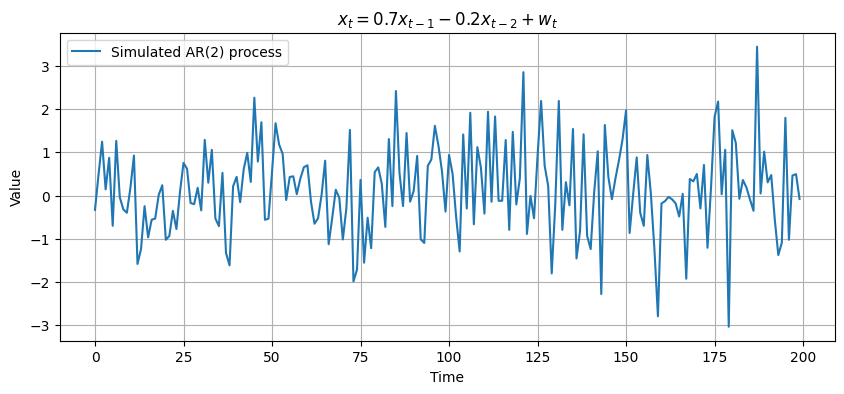

In [ ]:
# AR(2) process coefficients
ar = np.array([1, -0.7, 0.2]) 
ma = np.array([1, -0.7, 0.2])

# Create ARMA process
arma_process = ArmaProcess(ar, ma)

# Generate sample
x = arma_process.generate_sample(nsample=200)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, label='Simulated ARMA(2) process')
plt.title(r'$x_t = 0.7x_{t-1} - 0.2x_{t-2} + w_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


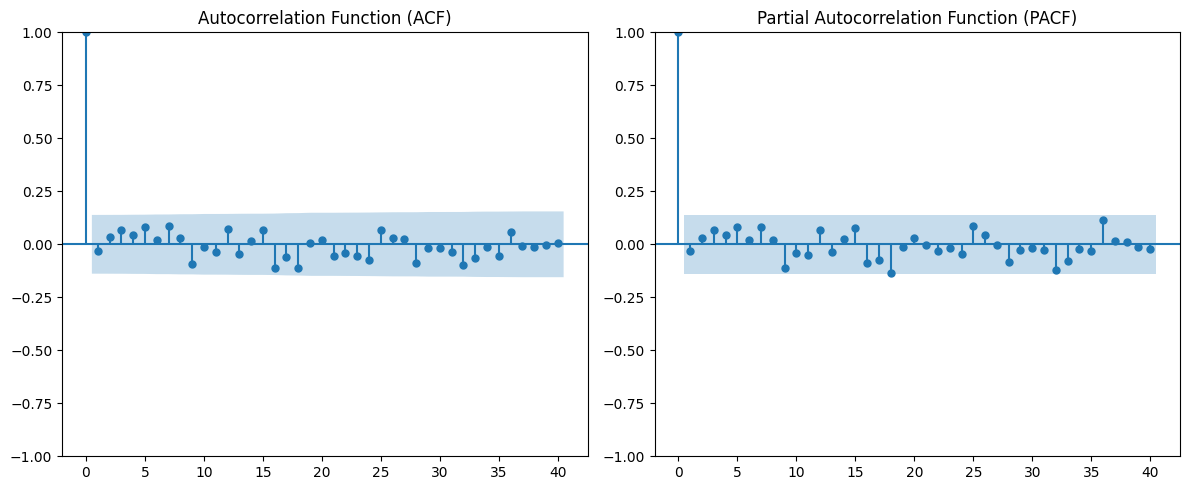

In [7]:
plot_acf_and_pacf(x)

### 1.4 Autoregressive Integrated Moving Avergae

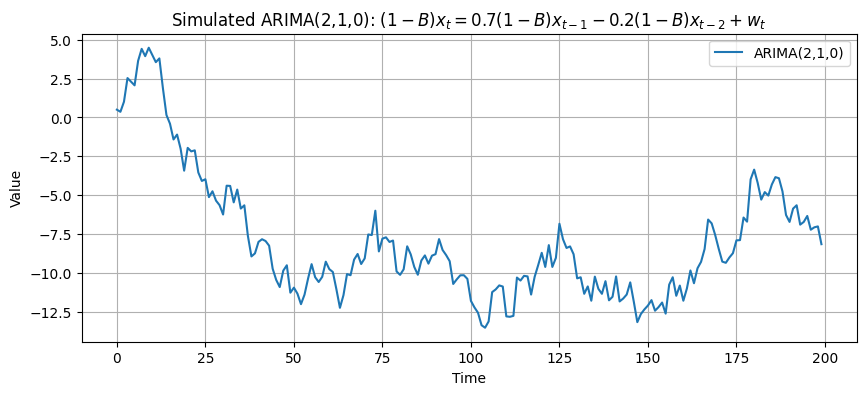

In [8]:
# ARIMA(2,1,0) -> difference once, then AR(2)
ar = np.array([1, -0.7, 0.2])
ma = np.array([1, -0.7, 0.2])

arma_process = ArmaProcess(ar, ma)

# Simulate the AR part (this gives the differenced series)
np.random.seed(42)
y_diff = arma_process.generate_sample(nsample=200)

# Integrate (undo differencing) to get ARIMA
x = np.cumsum(y_diff)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, label='ARIMA(2,1,0)')
plt.title(r'Simulated ARIMA(2,1,0): $(1 - B)x_t = 0.7(1 - B)x_{t-1} - 0.2(1 - B)x_{t-2} + w_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


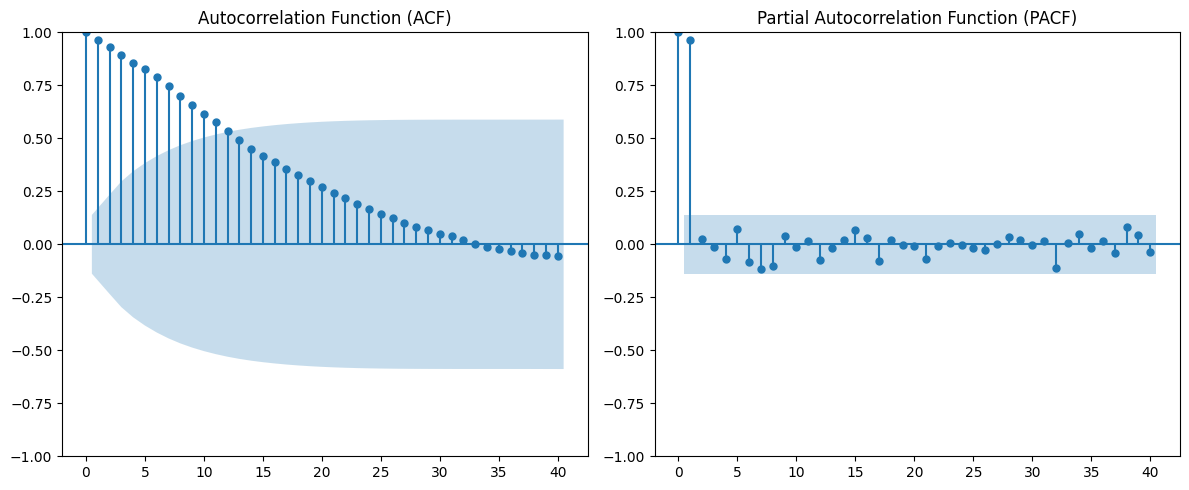

In [9]:
plot_acf_and_pacf(x)

### 1.5 Seasonal Autoregressive Integrated Moving Avergae

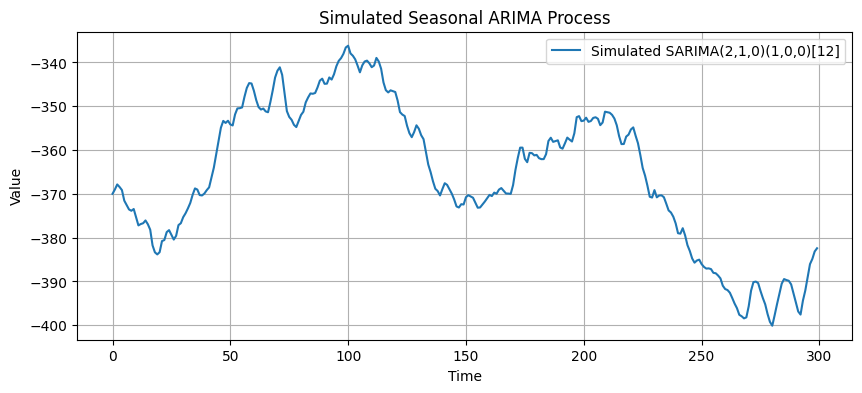

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

# Define SARIMA parameters
order = (2, 1, 0)          # (p, d, q)
seasonal_order = (1, 0, 0, 12)  # (P, D, Q, s)

# Create a SARIMA model with simulated data
# We'll fit to noise to generate SARIMA-like simulated series
n = 300
w = np.random.normal(0, 1, n)
model = SARIMAX(w, order=order, seasonal_order=seasonal_order)
x = model.simulate(params=[0.7, -0.2, 0.5, 1], nsimulations=n)
# params: [AR1, AR2, Seasonal_AR1, sigma2] in this order

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, label='Simulated SARIMA(2,1,0)(1,0,0)[12]')
plt.title('Simulated Seasonal ARIMA Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


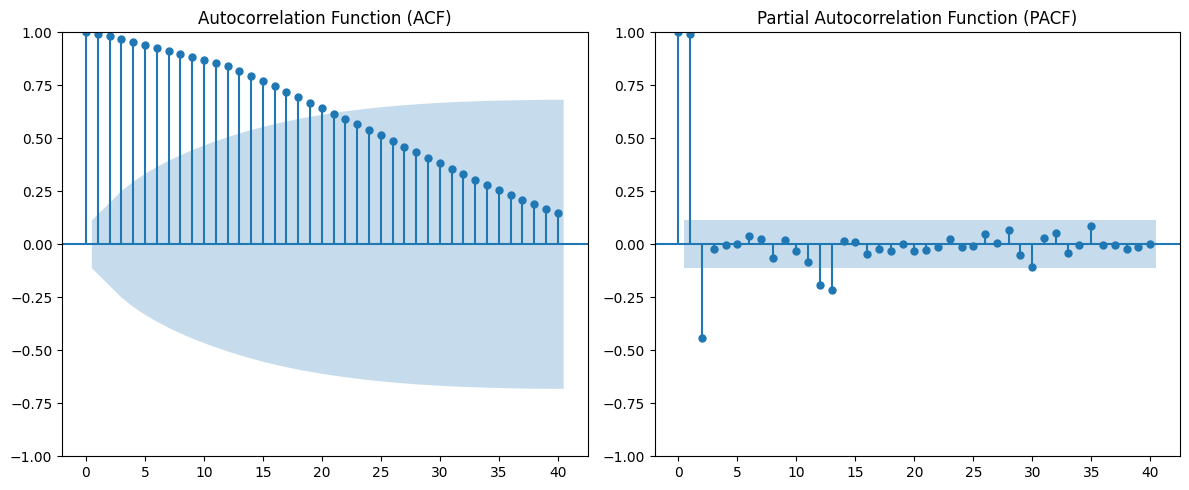

In [11]:
plot_acf_and_pacf(x)

## 2. Model real-world time series
- Is differencing required?
- Determine model order from ACF and PACF (review this summary).
- Estimate the model parameters.